In [1]:
!pip install -r requirements.txt

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import numpy as np
from WeakLearners import WongNeuralNetCIFAR10
import matplotlib.pyplot as plt


In [3]:
from Boosting import runBoosting

In [4]:
import utils

In [5]:
cuda = torch.device('cuda:0')

# Vanilla Wong Neural Net CIFAR10

In [6]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=100, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(
    testset, batch_size=300, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


## Non Adv

In [6]:
cifar10_vanilla = WongNeuralNetCIFAR10()
cifar10_vanilla.fit(train_loader, test_loader, alpha = 0, epochs = 100, adv=False, epsilon=0)

NameError: name 'train_loader' is not defined

In [ ]:
cifar10_vanilla.plot_train(batchSize = 100)

In [ ]:
cifar10_vanilla.plot_val_accuracies(batchSize = 100)

In [ ]:
print(cifar10_vanilla)

## Adversarial

In [7]:
from AdversarialAttacks import attack_fgsm

In [8]:
maxSamples = int(2e7)

In [9]:
cifar10_adv = WongNeuralNetCIFAR10(attack_eps=[0.01, 0.02, 0.05, 0.1])
cifar10_adv.fit(train_loader, test_loader, adv_train=True, val_attacks=[attack_fgsm], maxSample=maxSamples)

adv_train: True
Epoch 0
about to record accs [<function attack_fgsm at 0x7fe3b2593f28>]
about to attack <function attack_fgsm at 0x7fe3b2593f28>
losses, accs {'val': 2.0898959636688232, <function attack_fgsm at 0x7fe3b2593f28>: [2.1287121772766113, 2.1647350788116455, 2.258143424987793, 2.375598907470703]} {'val': 0.23333333333333334, <function attack_fgsm at 0x7fe3b2593f28>: [0.19, 0.16333333333333333, 0.09666666666666666, 0.05333333333333334]}
Val accuracy: 0.23333333333333334
Progress: 10000,  val accuracy: 0.2333
about to record accs [<function attack_fgsm at 0x7fe3b2593f28>]
about to attack <function attack_fgsm at 0x7fe3b2593f28>
losses, accs {'val': 1.959869623184204, <function attack_fgsm at 0x7fe3b2593f28>: [1.9798650741577148, 1.999502182006836, 2.0564332008361816, 2.1450536251068115]} {'val': 0.2733333333333333, <function attack_fgsm at 0x7fe3b2593f28>: [0.26, 0.25666666666666665, 0.21333333333333335, 0.16]}
Val accuracy: 0.2733333333333333
Progress: 20000,  val accuracy: 0.

/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:893: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


about to record accs [<function attack_fgsm at 0x7fe3b2593f28>]
about to attack <function attack_fgsm at 0x7fe3b2593f28>
losses, accs {'val': 1.641509771347046, <function attack_fgsm at 0x7fe3b2593f28>: [1.6618133783340454, 1.6823196411132812, 1.7450331449508667, 1.852507472038269]} {'val': 0.4033333333333333, <function attack_fgsm at 0x7fe3b2593f28>: [0.39666666666666667, 0.38333333333333336, 0.3466666666666667, 0.31333333333333335]}
Val accuracy: 0.4033333333333333
Progress: 60000,  val accuracy: 0.4033
about to record accs [<function attack_fgsm at 0x7fe3b2593f28>]
about to attack <function attack_fgsm at 0x7fe3b2593f28>
losses, accs {'val': 1.6471505165100098, <function attack_fgsm at 0x7fe3b2593f28>: [1.6688780784606934, 1.690873384475708, 1.7583563327789307, 1.8747402429580688]} {'val': 0.4166666666666667, <function attack_fgsm at 0x7fe3b2593f28>: [0.4066666666666667, 0.4033333333333333, 0.36333333333333334, 0.3233333333333333]}
Val accuracy: 0.4166666666666667
Progress: 70000,  

In [10]:
cifar10_adv.accuracies

{'train': [0.25,
  0.23,
  0.38,
  0.36,
  0.4,
  0.36,
  0.3,
  0.45,
  0.51,
  0.45,
  0.46,
  0.45,
  0.43,
  0.41,
  0.51,
  0.48,
  0.51,
  0.49,
  0.49,
  0.55,
  0.48,
  0.56,
  0.55,
  0.52,
  0.55,
  0.64,
  0.62,
  0.63,
  0.63,
  0.58,
  0.57,
  0.67,
  0.56,
  0.58,
  0.63,
  0.63,
  0.6,
  0.62,
  0.71,
  0.61,
  0.7,
  0.65,
  0.77,
  0.69,
  0.63,
  0.63,
  0.69,
  0.73,
  0.65,
  0.59,
  0.77,
  0.59,
  0.69,
  0.67,
  0.76,
  0.72,
  0.68,
  0.78,
  0.7,
  0.69,
  0.69,
  0.71,
  0.68,
  0.7,
  0.75,
  0.72,
  0.67,
  0.69,
  0.66,
  0.69,
  0.74,
  0.73,
  0.79,
  0.69,
  0.85,
  0.78,
  0.73,
  0.72,
  0.7,
  0.81,
  0.78,
  0.75,
  0.79,
  0.79,
  0.68,
  0.76,
  0.73,
  0.72,
  0.74,
  0.74,
  0.67,
  0.82,
  0.8,
  0.72,
  0.81,
  0.64,
  0.77,
  0.77,
  0.78,
  0.79,
  0.73,
  0.76,
  0.76,
  0.83,
  0.78,
  0.88,
  0.76,
  0.78,
  0.73,
  0.79,
  0.76,
  0.73,
  0.77,
  0.81,
  0.74,
  0.81,
  0.83,
  0.85,
  0.76,
  0.8,
  0.76,
  0.81,
  0.86,
  0.73,
  0.77,


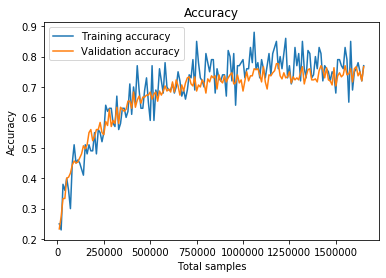

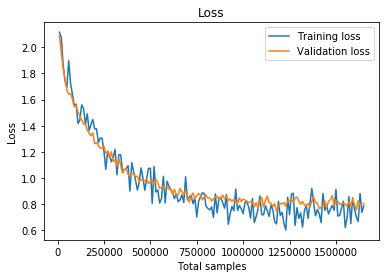

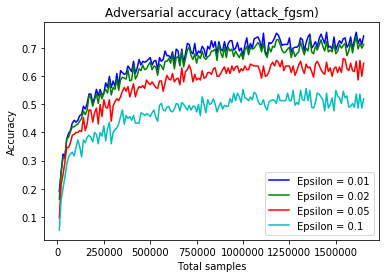

In [11]:
path_head = 'results/plots/cifar10_wl/'
acc_file = path_head + f'wl_acc_maxSamples_{maxSamples}.png'
adv_acc_file = path_head + f'adv_acc_maxSamples_{maxSamples}.png'
loss_file = path_head + f'loss_maxSamples_{maxSamples}.png'
cifar10_adv.plot_accuracies(acc_file)
cifar10_adv.plot_loss(loss_file)
cifar10_adv.plot_adversarial_accuracies(adv_acc_file)